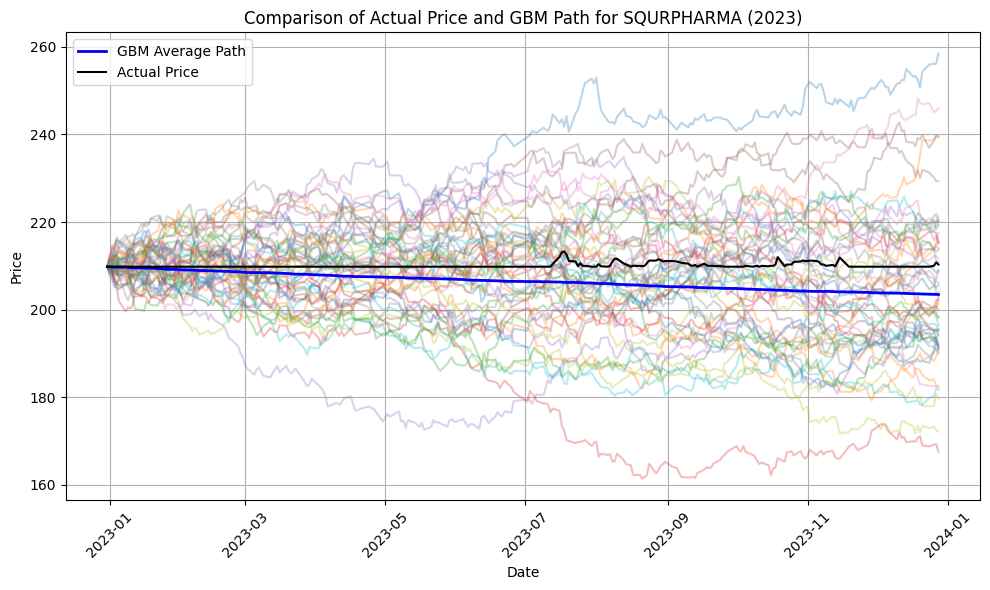

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import warnings

average_path_data = pd.read_csv('../results/gbm_price/SQURPHARMA.csv')
dse_df_2023 = pd.read_csv('./data/dse_df_2023.csv')
# Convert 'date' column to datetime format
average_path_data['date'] = pd.to_datetime(average_path_data['date'])
dse_df_2023['date'] = pd.to_datetime(dse_df_2023['date'])
# Filter actual price data for SQURPHARMA from dse_df_2023
actual_price_data = dse_df_2023[dse_df_2023['ticker'] == 'SQURPHARMA'][['date', 'open', 'close']]

# Get the minimum date and the corresponding open price
min_date = actual_price_data['date'].min()
min_open_price = actual_price_data[actual_price_data['date'] == min_date]['open'].values[0]

# Create a new row with date = min_date - 1 day and 'close' = min_open_price
new_row = pd.DataFrame({'date': [min_date - pd.Timedelta(days=1)], 'open': [min_open_price], 'close': [min_open_price]})

# Insert the new row at the beginning of the actual price DataFrame
actual_price_data = pd.concat([new_row, actual_price_data[['date', 'close']].rename(columns={'close': 'open'})], ignore_index=True)

# Insert the new row at the beginning of the GBM path DataFrame
new_gbm_row = pd.DataFrame({'date': [min_date - pd.Timedelta(days=1)], **{f'path_{i+1}': min_open_price for i in range(100)}})
average_path_data = pd.concat([new_gbm_row, average_path_data], ignore_index=True)

# Calculate the average GBM path
average_path_data['average'] = average_path_data.iloc[:, 1:].mean(axis=1)
average_path_data.sort_values('date', inplace=True)
actual_price_data.sort_values('date', inplace=True)
# Plot actual price and average GBM path
plt.figure(figsize=(10, 6))

# Plot randomly selected 50 GBM paths
gbm_paths = random.sample(list(average_path_data.columns[1:101]), 50)
for col in gbm_paths:
    plt.plot(average_path_data['date'], average_path_data[col], alpha=0.3)

# Plot average GBM path with a bold line
plt.plot(average_path_data['date'], average_path_data['average'], label='GBM Average Path', color='blue', linewidth=2)

# Plot actual price
plt.plot(actual_price_data['date'], actual_price_data['open'], label='Actual Price', color='black')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Comparison of Actual Price and GBM Path for SQURPHARMA (2023)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

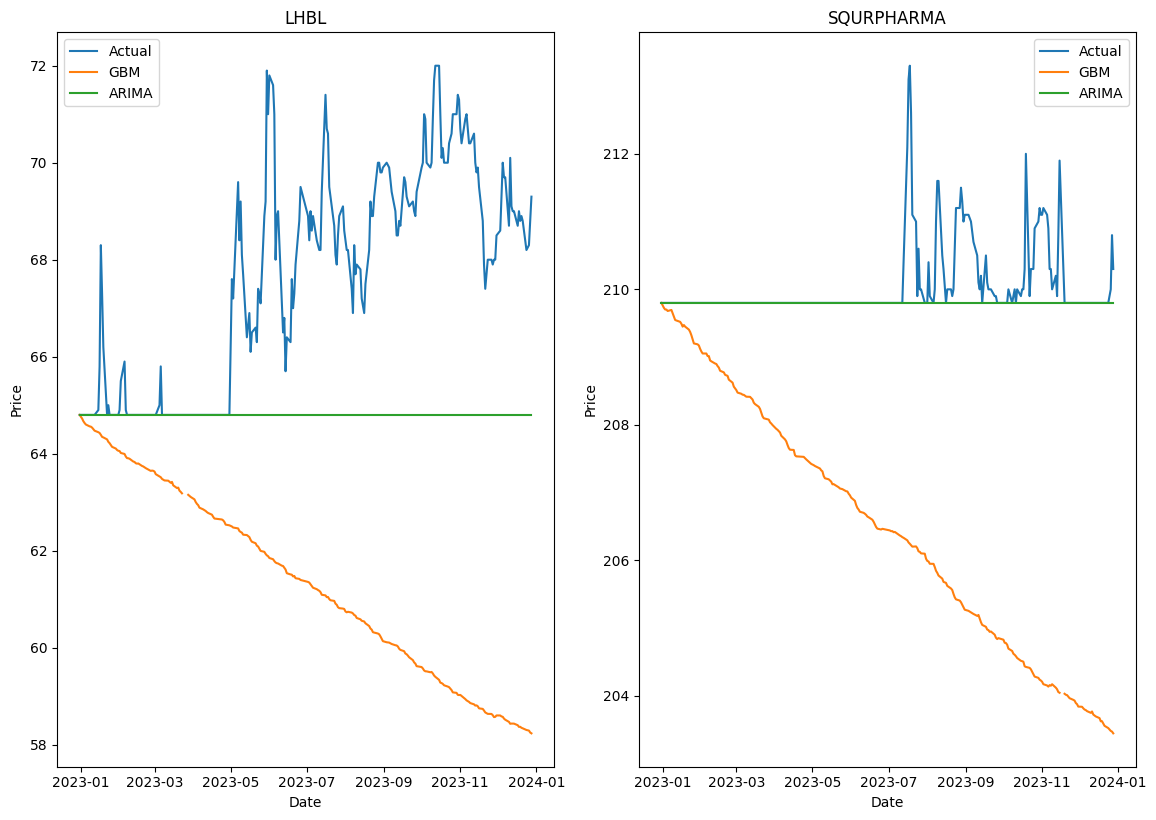

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data
dse_df_2023 = pd.read_csv('../data/dse_df_2023.csv')
average_paths = pd.read_csv('../results/average_paths_dse.csv')
arima_path = pd.read_csv('../results/arima/dse_arima_pred.csv')

# Convert 'date' column to datetime format
dse_df_2023['date'] = pd.to_datetime(dse_df_2023['date'])
average_paths['date'] = pd.to_datetime(average_paths['date'])
arima_path['date'] = pd.to_datetime(arima_path['date'])

# Get the minimum date
min_date = dse_df_2023['date'].min()

# Filter and prepare data for LHBL
LHBL_actual = dse_df_2023[dse_df_2023['ticker'] == 'LHBL'][['date', 'open', 'close']]
LHBL_gbm = average_paths[['LHBL','date']]
LHBL_arima = arima_path[['LHBL','date']]

min_open_price = LHBL_actual[LHBL_actual['date'] == min_date]['open'].values[0]
new_row = pd.DataFrame({'date': [min_date - pd.Timedelta(days=1)], 'open': [min_open_price], 'close': [min_open_price]})
LHBL_actual = pd.concat([new_row, LHBL_actual], ignore_index=True)[['date', 'close']].rename(columns={'close':'LHBL'})
LHBL_actual.sort_values('date', inplace=True)

LHBL_gbm = pd.concat([LHBL_actual.iloc[[0]], LHBL_gbm], ignore_index=True)
LHBL_gbm.sort_values('date', inplace=True)

LHBL_arima = pd.concat([LHBL_actual.iloc[[0]], LHBL_arima], ignore_index=True)
LHBL_arima.sort_values('date', inplace=True)

# Filter and prepare data for DELTALIFE
DELTALIFE_actual = dse_df_2023[dse_df_2023['ticker'] == 'DELTALIFE'][['date', 'open', 'close']]
DELTALIFE_gbm = average_paths[['DELTALIFE','date']]
DELTALIFE_arima = arima_path[['DELTALIFE','date']]

min_open_price = DELTALIFE_actual[DELTALIFE_actual['date'] == min_date]['open'].values[0]
new_row = pd.DataFrame({'date': [min_date - pd.Timedelta(days=1)], 'open': [min_open_price], 'close': [min_open_price]})
DELTALIFE_actual = pd.concat([new_row, DELTALIFE_actual], ignore_index=True)[['date', 'close']].rename(columns={'close':'DELTALIFE'})
DELTALIFE_actual.sort_values('date', inplace=True)

DELTALIFE_gbm = pd.concat([DELTALIFE_actual.iloc[[0]], DELTALIFE_gbm], ignore_index=True)
DELTALIFE_gbm.sort_values('date', inplace=True)

DELTALIFE_arima = pd.concat([DELTALIFE_actual.iloc[[0]], DELTALIFE_arima], ignore_index=True)
DELTALIFE_arima.sort_values('date', inplace=True)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(11.7, 8.3))  # A4 size in inches (29.7x21 cm)

# Plot for LHBL
axes[0].plot(LHBL_actual['date'], LHBL_actual['LHBL'], label='Actual')
axes[0].plot(LHBL_gbm['date'], LHBL_gbm['LHBL'], label='GBM')
axes[0].plot(LHBL_arima['date'], LHBL_arima['LHBL'], label='ARIMA')
axes[0].set_title('LHBL')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')
axes[0].legend()

# Plot for DELTALIFE
axes[1].plot(DELTALIFE_actual['date'], DELTALIFE_actual['DELTALIFE'], label='Actual')
axes[1].plot(DELTALIFE_gbm['date'], DELTALIFE_gbm['DELTALIFE'], label='GBM')
axes[1].plot(DELTALIFE_arima['date'], DELTALIFE_arima['DELTALIFE'], label='ARIMA')
axes[1].set_title('DELTALIFE')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price')
axes[1].legend()

# Adjust layout
plt.tight_layout()


# Show the plot
plt.show()
